Before SMOTE: Counter({0.0: 1152, 1.0: 204, 2.0: 123})
After SMOTE: Counter({0: 1152, 2: 1152, 1: 1152})
Random Forest Accuracy: 0.9369
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       247
         1.0       0.79      0.77      0.78        44
         2.0       0.93      0.96      0.94        26

    accuracy                           0.94       317
   macro avg       0.89      0.90      0.90       317
weighted avg       0.94      0.94      0.94       317

Confusion Matrix:
 [[238   9   0]
 [  8  34   2]
 [  1   0  25]]


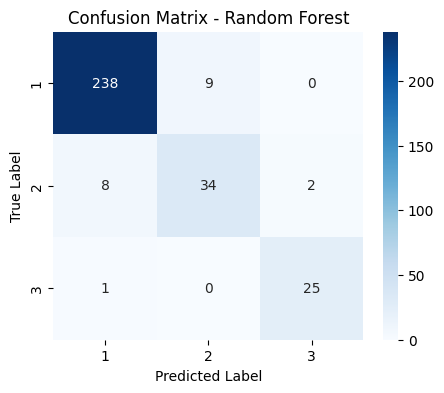

XGBoost Accuracy: 0.9338
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       247
         1.0       0.77      0.75      0.76        44
         2.0       0.93      0.96      0.94        26

    accuracy                           0.93       317
   macro avg       0.89      0.89      0.89       317
weighted avg       0.93      0.93      0.93       317

Confusion Matrix:
 [[238   9   0]
 [  9  33   2]
 [  0   1  25]]


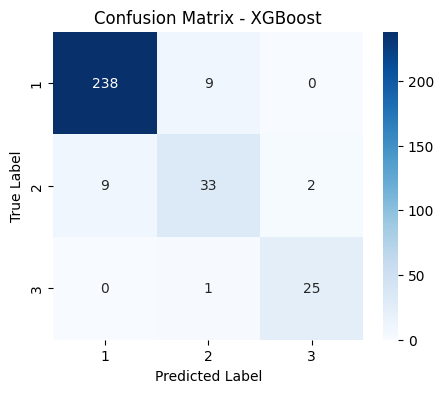

K-Nearest Neighbors Accuracy: 0.8675
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.85      0.92       247
         1.0       0.53      0.91      0.67        44
         2.0       0.83      0.92      0.87        26

    accuracy                           0.87       317
   macro avg       0.78      0.90      0.82       317
weighted avg       0.91      0.87      0.88       317

Confusion Matrix:
 [[211  33   3]
 [  2  40   2]
 [  0   2  24]]


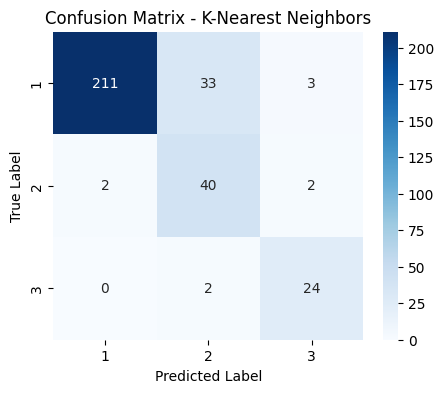

Gradient Boosting Accuracy: 0.9054
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       247
         1.0       0.65      0.77      0.71        44
         2.0       0.89      0.96      0.93        26

    accuracy                           0.91       317
   macro avg       0.84      0.89      0.86       317
weighted avg       0.91      0.91      0.91       317

Confusion Matrix:
 [[228  17   2]
 [  9  34   1]
 [  0   1  25]]


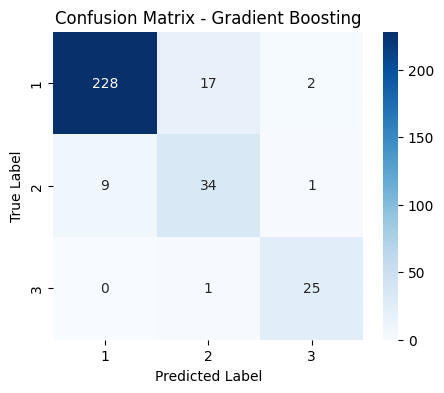

Stacked Model Accuracy: 0.9495
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       247
         1.0       0.85      0.77      0.81        44
         2.0       0.96      1.00      0.98        26

    accuracy                           0.95       317
   macro avg       0.93      0.92      0.92       317
weighted avg       0.95      0.95      0.95       317

Confusion Matrix:
 [[241   6   0]
 [  9  34   1]
 [  0   0  26]]


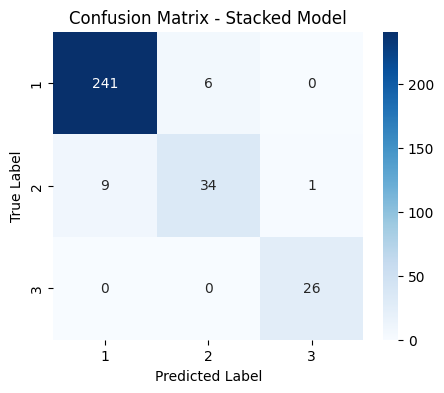

Random Forest Prediction: Class 2 (Suspect)
XGBoost Prediction: Class 3 (Pathological)
K-Nearest Neighbors Prediction: Class 2 (Suspect)
Gradient Boosting Prediction: Class 2 (Suspect)
Stacked Model Prediction: Class 2 (Suspect)

--- Model Prediction Probabilities ---
Random Forest Probabilities: [0.23 0.4  0.37]
XGBoost Probabilities: [0.20475091 0.3702507  0.42499834]
K-Nearest Neighbors Probabilities: [0. 1. 0.]
Gradient Boosting Probabilities: [0.2181077  0.48240373 0.29948857]
Stacked Model Probabilities: [0.02139951 0.71298139 0.2656191 ]


  0%|          | 0/3456 [00:00<?, ?it/s]

  0%|          | 0/3456 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Stacking Model Prediction: Class 2 (Suspect)

SHAP Values of Stacking Model:

                                                    SHAP Importance
percentage_of_time_with_abnormal_long_term_vari...         0.214476
abnormal_short_term_variability                            0.198151
histogram_mean                                             0.180567
accelerations                                              0.139500
prolongued_decelerations                                   0.134934
mean_value_of_short_term_variability                       0.105598
histogram_median                                           0.103930
uterine_contractions                                       0.070950
histogram_number_of_peaks                                  0.061985
fetal_movement                                             0.060239
mean_value_of_long_term_variability                        0.057975
histogram_mode                                             0.057522
baseline value                        

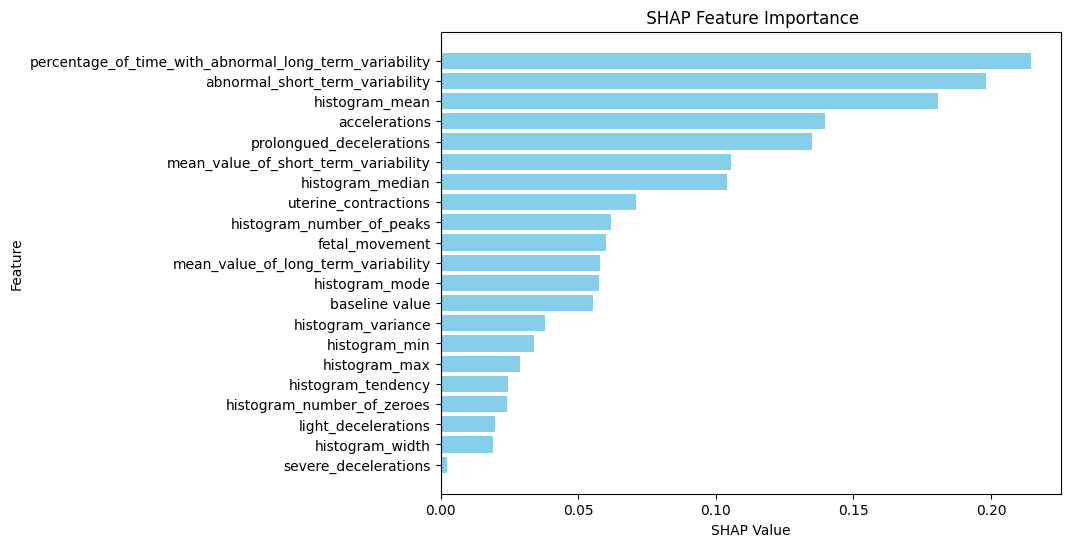


Top 3 Features Based on SHAP Importance:
                                                    SHAP Importance
percentage_of_time_with_abnormal_long_term_vari...         0.214476
abnormal_short_term_variability                            0.198151
histogram_mean                                             0.180567


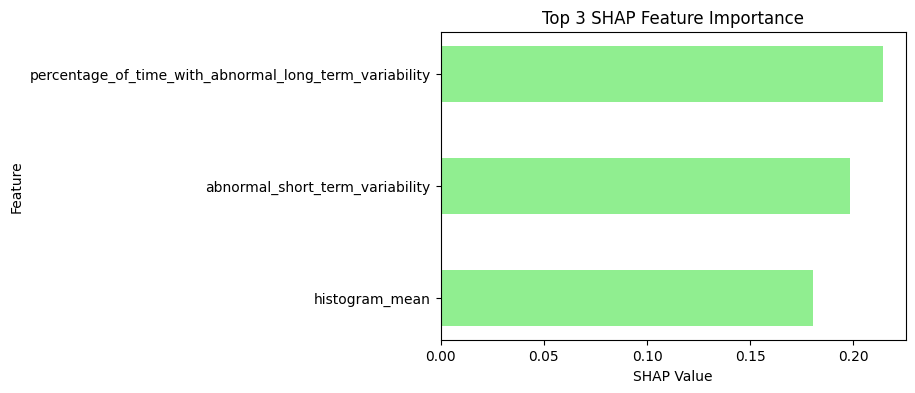


 Explanation Behind the Prediction 
 Feature 'percentage_of_time_with_abnormal_long_term_variability' has a SHAP value of 0.2145, increasing the probability of Suspect.
    Increased abnormal variability suggests an irregular fetal response to stimuli, requiring monitoring.
 Feature 'abnormal_short_term_variability' has a SHAP value of 0.1982, increasing the probability of Suspect.
    Mildly reduced variability may indicate fetal sleep or early signs of distress.
 Feature 'histogram_mean' has a SHAP value of 0.1806, increasing the probability of Suspect.
    Slight shifts may indicate transient fetal distress, requiring observation.

 Final Interpretation 
Fetal Health Condition is Suspect.
This decision was mostly influenced by percentage_of_time_with_abnormal_long_term_variability, abnormal_short_term_variability, and histogram_mean.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





data = pd.read_csv('fetal_health.csv')

data = data.drop_duplicates()


X = data.drop('fetal_health', axis=1)
y = data['fetal_health'] - 1  


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)




print("Before SMOTE:", Counter(y_train))


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
y_train_balanced = y_train_balanced.astype(int)

print("After SMOTE:", Counter(y_train_balanced))


scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=X.columns)
X_val_df = pd.DataFrame(X_val, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)


def train_and_evaluate(model, model_name):
    model.fit(X_train_balanced_df, y_train_balanced)
    y_pred = model.predict(X_test_df)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    warnings.filterwarnings("ignore")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_estimators=50, learning_rate=0.3, max_depth=3, reg_alpha=1, reg_lambda=1, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
}


for name, model in models.items():
    train_and_evaluate(model, name)


base_models = [('rf', models["Random Forest"]), ('xgb', models["XGBoost"]), ('knn', models["K-Nearest Neighbors"]), ('gb', models["Gradient Boosting"])]
meta_model = LogisticRegression()
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)
train_and_evaluate(stacked_model, "Stacked Model")


new_data = pd.DataFrame({
    'baseline value': [120], 'accelerations': [0], 'fetal_movement': [0], 'uterine_contractions': [0],
    'light_decelerations': [0], 'severe_decelerations': [0], 'prolongued_decelerations': [0],
    'abnormal_short_term_variability': [73], 'mean_value_of_short_term_variability': [0.5],
    'percentage_of_time_with_abnormal_long_term_variability': [43], 'mean_value_of_long_term_variability': [2.4],
    'histogram_width': [64], 'histogram_min': [62], 'histogram_max': [126], 'histogram_number_of_peaks': [2],
    'histogram_number_of_zeroes': [0], 'histogram_mode': [120], 'histogram_mean': [137], 'histogram_median': [121],
    'histogram_variance': [73], 'histogram_tendency': [1]
})
new_data = new_data[X.columns]


new_data_scaled_df = pd.DataFrame(scaler.transform(new_data), columns=X.columns)


new_data_scaled_df = pd.DataFrame(new_data_scaled_df.values, columns=X.columns)



class_labels = {0: 'Normal', 1: 'Suspect', 2: 'Pathological'}
predictions = {name: model.predict(new_data_scaled_df)[0] for name, model in models.items()}
probabilities = {name: model.predict_proba(new_data_scaled_df)[0] for name, model in models.items()}
stacking_prediction = stacked_model.predict(new_data_scaled_df)[0]
stacking_probabilities = stacked_model.predict_proba(new_data_scaled_df)[0]


for name, pred in predictions.items():
    print(f"{name} Prediction: Class {pred + 1} ({class_labels[pred]})")
print(f"Stacked Model Prediction: Class {stacking_prediction + 1} ({class_labels[stacking_prediction]})")


print("\n--- Model Prediction Probabilities ---")
for name, prob in probabilities.items():
    print(f"{name} Probabilities: {prob}")
print(f"Stacked Model Probabilities: {stacking_probabilities}")



explainer_rf = shap.TreeExplainer(models["Random Forest"])
shap_values_rf = explainer_rf.shap_values(X_train_balanced_df)

explainer_xgb = shap.TreeExplainer(models["XGBoost"])
shap_values_xgb = explainer_xgb.shap_values(X_train_balanced_df)


background = shap.kmeans(X_train_balanced_df, 10)

explainer_gb = shap.KernelExplainer(models["Gradient Boosting"].predict_proba, background)
shap_values_gb = explainer_gb.shap_values(X_train_balanced_df)

explainer_knn = shap.KernelExplainer(models["K-Nearest Neighbors"].predict_proba, background)
shap_values_knn = explainer_knn.shap_values(X_train_balanced_df)


def aggregate_shap_values(shap_values):
    return np.mean(np.abs(shap_values), axis=2) 

shap_values_rf = aggregate_shap_values(shap_values_rf)  
shap_values_xgb = aggregate_shap_values(shap_values_xgb)  
shap_values_gb = aggregate_shap_values(shap_values_gb)  
shap_values_knn = aggregate_shap_values(shap_values_knn)  




shap_matrix = np.mean(
    np.stack([shap_values_rf, shap_values_xgb, shap_values_gb, shap_values_knn]), axis=0
)



shap_importance_df = pd.DataFrame(
    shap_matrix.mean(axis=0),  
    index=X_train_balanced_df.columns,
    columns=["SHAP Importance"]
)

shap_importance_df = shap_importance_df.sort_values(by="SHAP Importance", ascending=False)



shap_input_sample = pd.DataFrame([shap_importance_df["SHAP Importance"].values], columns=X_train_balanced_df.columns)


shap_input_scaled = pd.DataFrame(scaler.transform(shap_input_sample), columns=X.columns)


stacking_pred = stacked_model.predict(shap_input_scaled)[0]



background = X_train_balanced_df.sample(n=50, random_state=42)


explainer_stacking = shap.KernelExplainer(stacked_model.predict_proba, background)


shap_values_stacking = explainer_stacking.shap_values(shap_input_scaled)




stacking_pred_index = int(stacking_prediction)  


shap_values_stacking_predicted = np.array(shap_values_stacking[:, :, stacking_pred_index])


shap_values_stacking_predicted = shap_values_stacking_predicted.reshape(1, -1)


shap_stacking_df = pd.DataFrame(
    shap_values_stacking_predicted,
    columns=X_train_balanced_df.columns
)


shap_impotance_df = shap_stacking_df.T.sort_values(by=0, ascending=False)


shap_impotance_df.columns = ["SHAP Impotance"]


print(f"Stacking Model Prediction: Class {stacking_prediction + 1} ({class_labels[stacking_prediction]})")
print("\nSHAP Values of Stacking Model:\n")
print(shap_importance_df)




shap_values_array = shap_importance_df.values.flatten()


plt.figure(figsize=(8, 6))
top_features = shap_importance_df.index
shap_scores = shap_importance_df["SHAP Importance"].values
plt.barh(top_features[::-1], shap_scores[::-1], color='skyblue')
plt.xlabel("SHAP Value")
plt.ylabel("Feature")


plt.title(" SHAP Feature Importance")
plt.show()



top_3_features = shap_importance_df.head(3)


print("\nTop 3 Features Based on SHAP Importance:")
print(top_3_features)


plt.figure(figsize=(6, 4))
plt.barh(
    top_3_features.index[::-1], 
    top_3_features["SHAP Importance"].values[::-1], 
    color='lightgreen', 
    height=0.5 
)
plt.xlabel("SHAP Value")
plt.ylabel("Feature")
plt.title("Top 3 SHAP Feature Importance")
plt.show()



feature_explanations = {
    "baseline_value": {
        "Normal": "Baseline heart rate suggests stable autonomic function and adequate fetal oxygenation.",
        "Suspect": "Slight irregularities in baseline may reflect transient maternal or fetal stressors.",
        "Pathological": "Abnormal baseline indicates possible fetal hypoxia or compromised neurological status."
    },
    "accelerations": {
        "Normal": "Consistent accelerations indicate intact fetal autonomic and central nervous system function.",
        "Suspect": "Diminished accelerations may reflect fetal quiescence or mild compromise.",
        "Pathological": "Absent accelerations suggest impaired fetal responsiveness or possible hypoxia."
    },
    "fetal_movement": {
        "Normal": "Active movements reflect a healthy fetal neuro-muscular status.",
        "Suspect": "Reduced movements may suggest transient rest phases or mild compromise.",
        "Pathological": "Markedly diminished movements indicate potential hypoxia or neurologic dysfunction."
    },
    "uterine_contractions": {
        "Normal": "Regular moderate contractions support normal uteroplacental function",
        "Suspect": "Increased frequency may transiently reduce fetal oxygenation and requires monitoring.",
        "Pathological": "Excessive or prolonged contractions may impair placental perfusion and induce fetal distress."
    },
    "light_decelerations": {
        "Normal": "Isolated mild decelerations are typically benign and related to fetal movement.",
        "Suspect": "Frequent episodes may indicate transient umbilical cord compression.",
        "Pathological": "Recurrent or prolonged decelerations may reflect compromised fetal oxygenation."
    },
    "severe_decelerations": {
        "Normal": "No severe decelerations or only occasional occurrences suggest stable fetal well-being.",
        "Suspect": "Occasional severe decelerations may be present, warranting further investigation to assess fetal status.",
        "Pathological": "Frequent or prolonged decelerations are indicative of significant fetal distress, requiring immediate intervention."

    },
    "prolongued_decelerations": {
        "Normal": "Absent under normal circumstances, indicating no fetal distress.",
        "Suspect": "Occasional prolonged decelerations may occur, requiring further evaluation to determine fetal well-being.",
        "Pathological": "Persistent prolonged decelerations are indicative of fetal compromise and may necessitate urgent medical intervention."
    },
    "abnormal_short_term_variability": {
        "Normal": "Normal variability in heart rate indicates a healthy autonomic system.",
        "Suspect": "Mildly reduced variability may indicate fetal sleep or early signs of distress.",
        "Pathological": "Significantly reduced variability signals potential fetal compromise and requires further assessment."
    },
    "mean_value_of_short_term_variability": {
        "Normal": "Falls within a typical range, indicating good fetal reactivity.",
        "Suspect": "Mildly reduced variability requires observation to assess fetal condition.",
        "Pathological": "Extremely low variability may suggest fetal distress or central nervous system dysfunction."
    },
    "percentage_of_time_with_abnormal_long_term_variability": {
        "Normal": "Minimal abnormal variability is expected in a healthy fetus.",
        "Suspect": "Increased abnormal variability suggests an irregular fetal response to stimuli, requiring monitoring.",
        "Pathological": "High percentages of abnormal variability indicate significant instability in fetal heart rate control."
    },
    "mean_value_of_long_term_variability": {
       "Normal": "Fluctuations within the expected range reflect a healthy fetal nervous system.",
       "Suspect": "Mildly abnormal values may suggest minor fetal stress, warranting monitoring.",
       "Pathological": "Severely reduced variability indicates significant fetal distress, requiring urgent attention."
    },
    "histogram_width": {
        "Normal": "A well-distributed heart rate pattern suggests stable fetal health.",
        "Suspect": "A narrow or excessively broad range may indicate altered fetal heart rate control, requiring further evaluation.",
        "Pathological": "Extreme values suggest severe fetal distress or arrhythmia, needing immediate intervention."

    },
    "histogram_min": {
        "Normal": "The lowest recorded fetal heart rate is within a safe range, indicating no concern.",
        "Suspect": "Slightly lower values may require further observation to assess fetal status.",
        "Pathological": "Very low values may indicate fetal bradycardia, signaling potential distress and the need for urgent care."
    },
    "histogram_max": {
        "Normal": "Highest recorded fetal heart rate within the expected range, indicating normal fetal well-being.",
        "Suspect": "Slight elevations may reflect temporary fetal stress, warranting monitoring.",
        "Pathological": "Extremely high values suggest fetal tachycardia, requiring immediate intervention."

    },
    "histogram_number_of_peaks": {
        "Normal": "Normal variation in heart rate, indicating healthy autonomic function.",
        "Suspect": "Fewer peaks may indicate reduced heart rate variability, suggesting early signs of distress.",
        "Pathological": "A flat histogram suggests a lack of variability, indicating potential fetal compromise."

    },
    "histogram_number_of_zeroes": {
        "Normal": "Few or no zeroes observed, indicating normal heart rate activity.",
        "Suspect": "Increased zeroes may indicate erratic heart rate, warranting further assessment.",
        "Pathological": "High zero counts may suggest recording errors or a serious condition such as cardiac arrest."
    },
    "histogram_mode": {
        "Normal": "The most frequent heart rate is within a healthy range, indicating normal fetal function.",
        "Suspect": "Shifts in mode suggest altered heart rate regulation, requiring further investigation.",
        "Pathological": "Mode outside the normal fetal heart rate range signals fetal compromise and the need for immediate evaluation."
    },
    "histogram_mean": {
       "Normal": "The mean value reflects a stable and typical heart rate distributio.",
       "Suspect": "Slight shifts may indicate transient fetal distress, requiring observation.",
       "Pathological": "A significant deviation suggests irregular heart rate regulation, signaling possible fetal compromise."
    },
    "histogram_median": {
        "Normal": "The median aligns closely with the mean, indicating a normal heart rate pattern.",
        "Suspect": "Differences between the median and mean may suggest irregularities, warranting further evaluation.",
        "Pathological": "A large gap indicates asymmetric heart rate patterns, possibly due to fetal distress."

    },
    "histogram_variance": {
        "Normal": "A balanced variance suggests stable heart rate variation.",
        "Suspect": "Increased variance may indicate instability in the heart rate pattern, requiring monitoring.",
        "Pathological": "Extremely high or low variance signals potential fetal distress, needing urgent attention."

    },
    "histogram_tendency": {
        "Normal": "A stable heart rate tendency with mild fluctuations indicates healthy fetal status.",
        "Suspect": "Increasing or decreasing tendencies may suggest temporary stress and require observation.",
        "Pathological": "A strong tendency toward bradycardia or tachycardia is concerning and may indicate fetal compromise."
    }
}




class_labels = {0: "Normal", 1: "Suspect", 2: "Pathological"}


predicted_class = class_labels[stacking_prediction]


print("\n Explanation Behind the Prediction ")

explanation_text = []
for feature, value in top_3_features.itertuples():
    impact_direction = "increasing" if value > 0 else "decreasing"
    explanation = feature_explanations.get(feature, {}).get(predicted_class, "No explanation available.")
    explanation_text.append(f" Feature '{feature}' has a SHAP value of {value:.4f}, {impact_direction} the probability of {predicted_class}.\n    {explanation}")


for explanation in explanation_text:
    print(explanation)


print("\n Final Interpretation ")
print(f"Fetal Health Condition is {predicted_class}.")
print(f"This decision was mostly influenced by {top_3_features.index[0]}, {top_3_features.index[1]}, and {top_3_features.index[2]}.")


In [6]:
import pickle

# Save the trained model to a file
with open('ctg_ensembel_model.pkl', 'wb') as model_file:
    pickle.dump(stacked_model, model_file)

print("Model saved successfully!")


Model saved successfully!


In [7]:
with open("ctg_scalre.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)
